----
# **DECISION TREE**
-----

### OBJECTIVE :

####  Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results

### TASKS :

##### DATA PREPROCESSING :

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
df=pd.read_excel('heart_disease_1.xlsx',sheet_name='Heart_disease')

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [13]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [14]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


####  EXPLORATORY DATA ANALYSIS (EDA) :

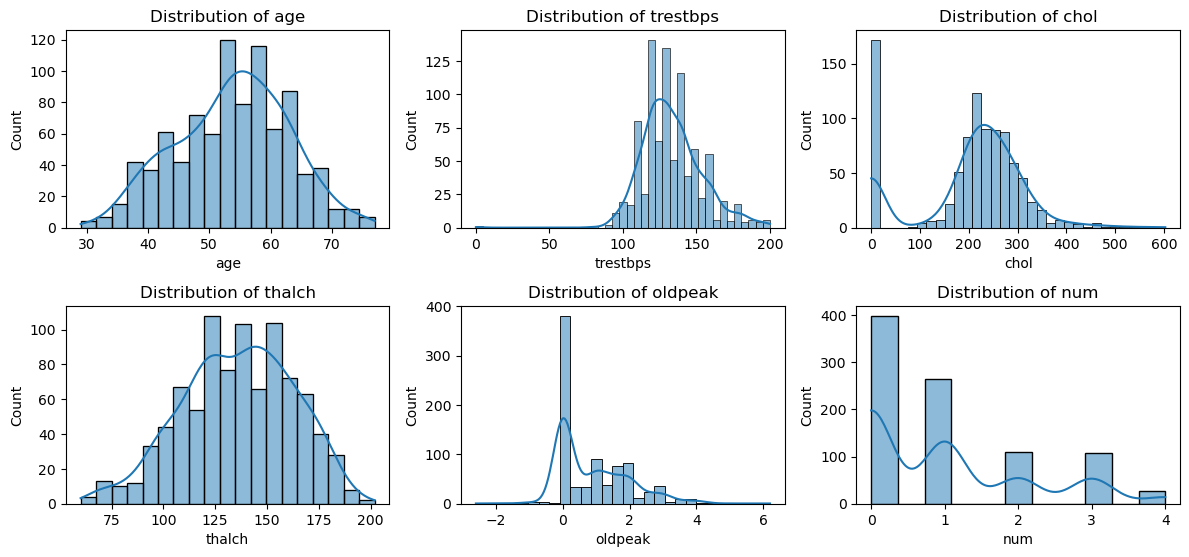

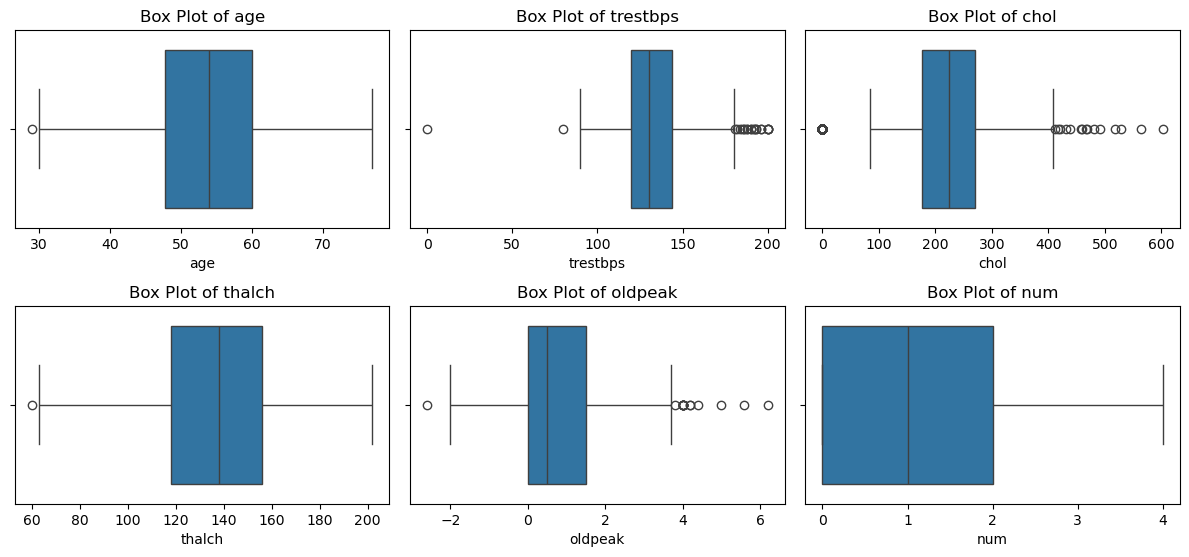

In [16]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

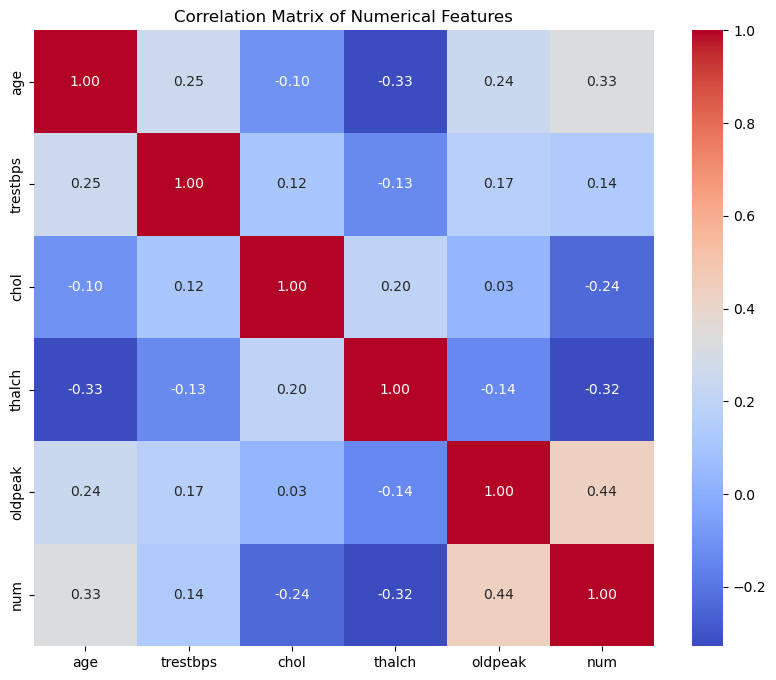

In [17]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

####  FEATURE ENGINEERING :

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Convert boolean columns to integers
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

In [39]:
# Convert 'exang' boolean values to integers
df['exang'] = df['exang'].replace({'FALSE': 0, 'TRUE': 1,'TURE': 1}).astype(int)
df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0}).astype(object)

# Encode categorical columns 'slope' and 'thal' with LabelEncoder
label_encoders = {}
for column in ['slope', 'thal','restecg','cp']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [41]:

# Impute missing values in 'oldpeak' with the mean
imputer = SimpleImputer(strategy='mean')
df['oldpeak'] = imputer.fit_transform(df[['oldpeak']])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

data_encoded=df.copy()

# Display the transformed dataset's first few rows to verify changes
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,1,0,0.524183,0,1.334996,0,0,0
1,-1.397560,1,1,0.076967,0.013526,0,1,-0.147705,0,-0.844594,1,0,0
2,0.350503,1,0,0.322181,-0.084656,0,1,0.449529,0,-0.465535,1,0,0
3,-0.195767,1,3,-0.756760,-0.138211,0,0,2.017268,0,-0.844594,1,0,0
4,0.350503,1,0,-1.149102,-0.004325,0,1,-0.371668,1,0.576878,1,0,0


####  DECISION TREE CLASSIFICATION :

In [43]:
# Define X (features) and y (target)
X = data_encoded.drop('num', axis=1)  # 'num' is the target column
y = data_encoded['num']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test) if len(y.unique()) > 2 else clf.predict_proba(X_test)[:, 1], multi_class='ovr' if len(y.unique()) > 2 else 'raise')

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [47]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.54
Precision: 0.52
Recall: 0.54
F1 Score: 0.53
ROC-AUC Score: 0.61


#### HYPERPARAMETER TUNING :

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

In [52]:
# Assuming 'num' is the target variable
X = df.drop('num', axis=1)
y = df['num']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


#### MODEL EVALUATION AND ANALYSIS :

In [57]:
# Make predictions
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')  # Use OVR for multiclass AUC

In [59]:
# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.57
Precision: 0.48
Recall: 0.57
F1-Score: 0.52
ROC-AUC Score: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.43      0.50      0.46        48
           2       0.00      0.00      0.00        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.27      0.32      0.29       182
weighted avg       0.48      0.57      0.52       182



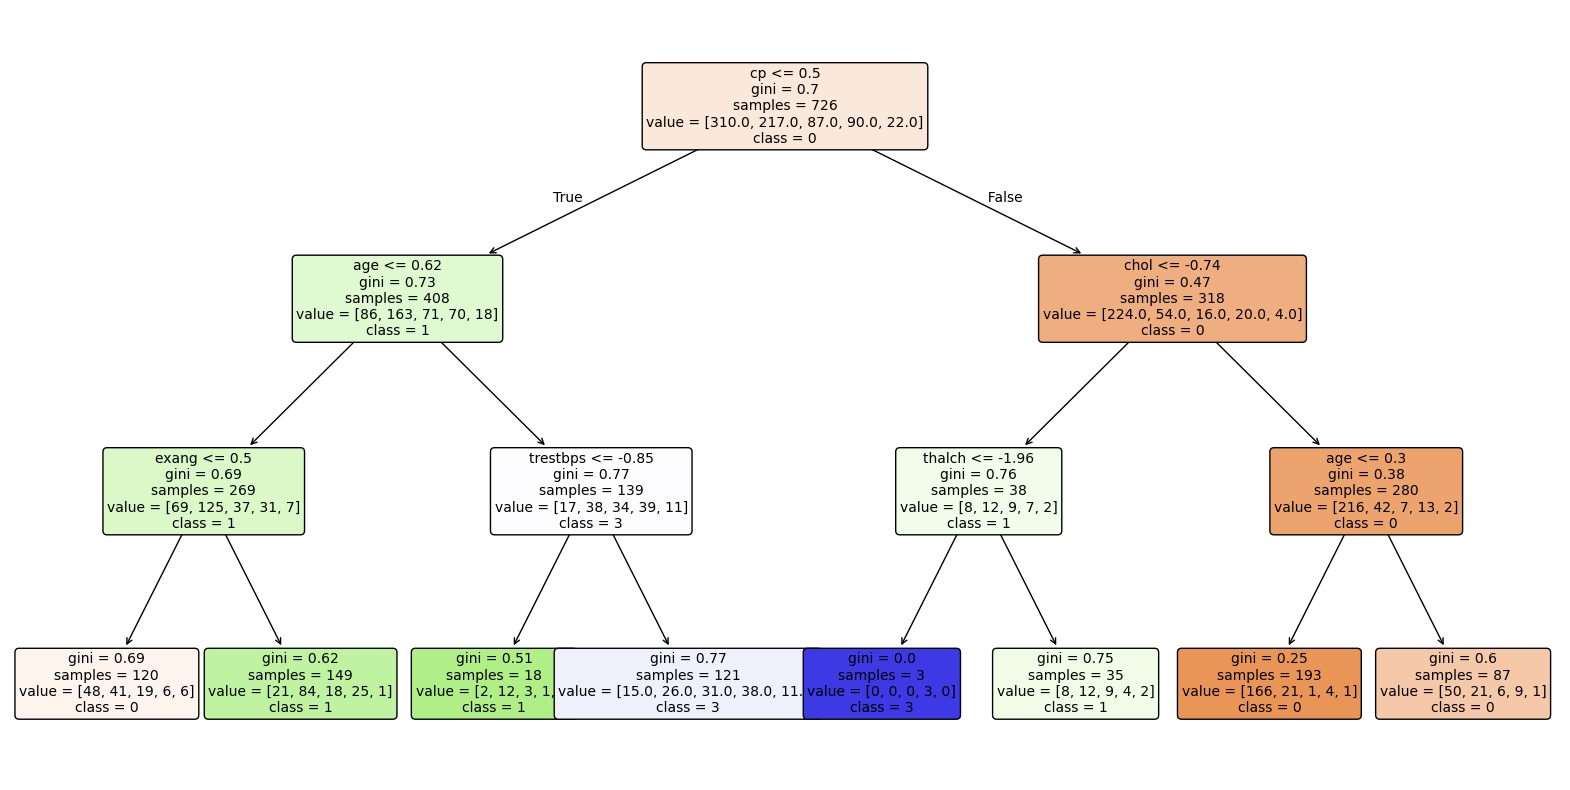

In [79]:
# Determine unique class names from the target variable
unique_classes = np.unique(y)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tree with improved readability
plt.figure(figsize=(20, 10))  # Increase figure size for better readability
plot_tree(
    best_model,
    feature_names=X.columns,               # Use feature names for clarity
    class_names=[str(cls) for cls in unique_classes],  # Display class names
    filled=True,
    rounded=True,
    precision=2,                           # Limit decimal places
    fontsize=10                            # Increase font size for readability
)
plt.show()



### Key Features:
- cp (chest pain type): This feature is the root node, meaning it is the most important feature for the initial split
- age: Appears in multiple branches, indicating it plays a significant role in classifying samples in both left and right branches
- chol (cholesterol level): Splits a major portion of the data on the right side, indicating it's an important feature for distinguishing -samples in that branch
- thalch (maximum heart rate achieved) and trestbps (resting blood pressure): These features also influence specific branches, but they appear further down the tree, so they are relatively less important than the ones at higher nodes

# Interview Questions:


### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance ?

### 2. Difference Between Label Encoding and One-hot Encoding ?